In [149]:
import sqlite3
import pandas as pd
import numpy as np
import os
from pandas_dq import dq_report
import matplotlib.pyplot as plt


# SQL queries to retrieve tables from database

This part of the code is to simulate the generation of extracts from the database using SQL berofe performing the data wrangling with python.

In [150]:
conn = sqlite3.connect("./gaming_data_full.db")

In [151]:
df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)


In [152]:
df

,name
0,players
1,bets
2,games
3,transactions
4,sessions
5,campaigns


In [153]:
df_info = pd.read_sql_query("PRAGMA table_info(players);", conn)
df_info

,cid,name,type,notnull,dflt_value,pk
0,0,player_id,INTEGER,0,None,0
1,1,registration_date,DATE,0,None,0
2,2,country,TEXT,0,None,0
3,3,age,INTEGER,0,None,0
4,4,device,TEXT,0,None,0


In [154]:
players = pd.read_sql_query("" \
"SELECT player_id, registration_date, country, age, device " \
"FROM players ;", conn)

players


,player_id,registration_date,country,age,device
0,1,2023-04-15,USA,54,Mobile
1,2,2024-09-05,Canada,33,Desktop
2,3,2024-08-31,UK,56,Mobile
3,4,2023-07-24,Australia,59,Tablet
4,5,2023-12-12,China,56,Tablet
...,...,...,...,...,...
995,996,2024-10-16,Germany,23,Mobile
996,997,2023-09-28,India,29,Tablet
997,998,2024-07-06,USA,68,Tablet
998,999,2025-01-26,Germany,32,Tablet


In [155]:
df_info = pd.read_sql_query("PRAGMA table_info(bets);", conn)
df_info

,cid,name,type,notnull,dflt_value,pk
0,0,bet_id,INTEGER,0,None,0
1,1,player_id,INTEGER,0,None,0
2,2,bet_time,TIMESTAMP,0,None,0
3,3,game_type,TEXT,0,None,0
4,4,bet_amount,REAL,0,None,0
5,5,win_amount,REAL,0,None,0


In [156]:
bets = pd.read_sql_query("" \
"SELECT bet_id, player_id, bet_time, game_type, bet_amount, win_amount " \
"FROM bets ;", conn)

bets

,bet_id,player_id,bet_time,game_type,bet_amount,win_amount
0,1,668,2024-07-17 18:47:03,Slots,853.20,1279.80
1,2,628,2024-11-11 04:50:07,Sports Betting,477.25,0.00
2,3,750,2024-09-24 01:19:48,Table Games,170.43,255.65
3,4,929,2024-08-09 05:45:14,Sports Betting,698.21,1396.42
4,5,396,2024-10-02 07:10:08,Table Games,581.13,0.00
...,...,...,...,...,...,...
9995,9996,568,2024-06-21 15:26:25,Slots,429.36,429.36
9996,9997,440,2024-07-20 12:39:57,Table Games,91.19,0.00
9997,9998,313,2024-04-15 07:44:28,Table Games,946.43,0.00
9998,9999,679,2024-12-05 12:39:20,Slots,206.97,413.94


In [157]:
df_info = pd.read_sql_query("PRAGMA table_info(games);", conn)
df_info

,cid,name,type,notnull,dflt_value,pk
0,0,game_id,INTEGER,0,None,0
1,1,game_type,TEXT,0,None,0
2,2,provider,TEXT,0,None,0
3,3,volatility,TEXT,0,None,0
4,4,release_date,DATE,0,None,0
5,5,rtp,TEXT,0,None,0


In [198]:
games = pd.read_sql_query("" \
"SELECT game_id, game_type, provider, volatility, release_date, rtp " \
"FROM games ;", conn)

games

,game_id,game_type,provider,volatility,release_date,rtp
0,1,Table Games,Evolution,low,2024-06-22,0.857340123254998
1,2,Live Casino,Evolution,medium,2023-12-22,0.939071020979696
2,3,Sports Betting,NetEnt,medium,2025-03-01,0.85344671856861
3,4,Sports Betting,NetEnt,high,2022-04-12,0.874663686077408
4,5,Sports Betting,Evolution,high,2021-05-30,0.964825529600859
5,6,Slots,Evolution,medium,2022-03-16,0.956424196752683
6,7,Slots,Playtech,high,2024-11-27,0.905306101754007
7,8,Live Casino,Microgaming,low,2022-07-08,0.971592942039528
8,9,Sports Betting,NetEnt,low,2022-02-16,0.874619192939181
9,10,Sports Betting,NetEnt,low,2021-03-09,0.960259652632198


In [159]:
df_info = pd.read_sql_query("PRAGMA table_info(transactions);", conn)
df_info

,cid,name,type,notnull,dflt_value,pk
0,0,transactio_id,INTEGER,0,None,0
1,1,player_id,INTEGER,0,None,0
2,2,transaction_time,TIMESTAMP,0,None,0
3,3,transaction_type,TEXT,0,None,0
4,4,transaction_amount,REAL,0,None,0
5,5,payment_method,TEXT,0,None,0
6,6,amount,REAL,0,None,0


In [160]:
transaction = pd.read_sql_query("" \
"SELECT transactio_id, player_id, transaction_time, transaction_type, transaction_amount, payment_method, amount  " \
"FROM transactions ;", conn)

transaction

,transactio_id,player_id,transaction_time,transaction_type,transaction_amount,payment_method,amount
0,1,560,2024-05-17 14:41:42,"""deposit""",373.96,crypto,None
1,2,325,2024-04-28 19:24:08,"""withdrawal""",869.97,crypto,None
2,3,467,2024-12-07 05:42:36,"""withdrawal""",468.41,crypto,None
3,4,719,2024-09-11 19:44:11,"""deposit""",577.80,credit_card,None
4,5,702,2025-03-16 03:40:11,"""deposit""",615.54,credit_card,None
...,...,...,...,...,...,...,...
4995,4996,369,2025-03-03 17:53:51,"""bonus""",397.59,bank_transfer,None
4996,4997,971,2024-06-27 07:32:00,"""bonus""",101.42,paypal,None
4997,4998,954,2024-10-22 17:15:37,"""withdrawal""",926.97,credit_card,None
4998,4999,343,2024-05-23 08:28:46,"""deposit""",522.35,paypal,None


In [161]:
df_info = pd.read_sql_query("PRAGMA table_info(sessions);", conn)
df_info

,cid,name,type,notnull,dflt_value,pk
0,0,session_id,INTEGER,0,None,0
1,1,player_id,INTEGER,0,None,0
2,2,game_id,INTEGER,0,None,0
3,3,session_start,TIMESTAMP,0,None,0
4,4,session_end,TIMESTAMP,0,None,0
5,5,bet_amount,REAL,0,None,0
6,6,win_amount,REAL,0,None,0


In [162]:
sessions = pd.read_sql_query("" \
"SELECT *  " \
"FROM sessions ;", conn)

sessions

,session_id,player_id,game_id,session_start,session_end,bet_amount,win_amount
0,1,959,14,2025-02-22 21:16:40,2025-02-22 21:48:40,3.90,0.00
1,2,314,11,2024-10-25 02:44:34,2024-10-25 03:46:34,747.22,1494.44
2,3,532,26,2024-12-26 07:41:06,2024-12-26 08:58:06,145.97,145.97
3,4,584,17,2024-06-02 13:55:40,2024-06-02 14:18:40,868.20,1302.30
4,5,612,43,2024-07-23 00:57:18,2024-07-23 02:53:18,412.98,2064.90
...,...,...,...,...,...,...,...
10495,4235,397,15,2024-07-18 14:53:39,2024-07-18 15:42:39,78.95,0.00
10496,8166,360,3,2024-10-12 14:31:06,2024-10-12 15:44:06,528.03,0.00
10497,5048,663,30,2024-10-16 04:47:15,2024-10-16 05:42:15,956.67,0.00
10498,7921,858,36,2024-11-14 16:17:01,2024-11-14 17:07:01,907.41,907.41


In [163]:
df_info = pd.read_sql_query("PRAGMA table_info(campaigns);", conn)
df_info

,cid,name,type,notnull,dflt_value,pk
0,0,campaign_id,INTEGER,0,None,0
1,1,player_id,INTEGER,0,None,0
2,2,name,TEXT,0,None,0
3,3,reward,REAL,0,None,0
4,4,assigned_at,TIMESTAMP,0,None,0
5,5,redeemed,INTEGER,0,None,0


In [164]:
campaigns = pd.read_sql_query("" \
"SELECT *  " \
"FROM campaigns ;", conn)

campaigns

,campaign_id,player_id,name,reward,assigned_at,redeemed
0,1,843,VIP Reward,76.32,2025-03-20 03:09:14,0
1,2,117,Free Spins,98.89,2025-02-08 03:24:13,0
2,3,292,Welcome Bonus,17.87,2024-05-22 14:19:31,1
3,4,785,Free Spins,52.72,2024-06-22 17:02:23,1
4,5,-1,Free Spins,5.59,2025-03-17 14:00:20,0
...,...,...,...,...,...,...
795,796,130,Welcome Bonus,73.24,2024-06-09 12:46:34,0
796,797,382,Welcome Bonus,66.90,2024-11-12 23:17:38,0
797,798,229,VIP Reward,17.02,2024-09-21 18:05:52,0
798,799,538,Welcome Bonus,67.54,2024-08-14 23:51:04,1


Let's say that for some specific KPI I would need to get a table with the average age of the players per payment type

In [165]:
player_payment = pd.read_sql_query("" \
"SELECT ROUND(AVG(COALESCE(p.age,0)),2) AS average_age, t.payment_method  " \
"FROM transactions t " \
"LEFT JOIN players p ON p.player_id = t.player_id " \
"GROUP BY t.payment_method " \
"ORDER BY AVG(COALESCE(p.age,0)) ASC;", conn)

player_payment

,average_age,payment_method
0,41.61,bank_transfer
1,41.81,crypto
2,42.29,credit_card
3,42.32,paypal


Or let's imagine that I would need another KPI that would ask for the acumulated bet amount and loss amount over the time per player (window function)

In [166]:
player_payment = pd.read_sql_query("" \
"SELECT bet_amount, win_amount, player_id, bet_time," \
"SUM(win_amount) OVER (PARTITION BY player_id ORDER BY bet_time) AS Win_Acumulated," \
"SUM(bet_amount) OVER (PARTITION BY player_id ORDER BY bet_time) AS Bet_Acumulated " \
"FROM bets b ", conn)

player_payment

,bet_amount,win_amount,player_id,bet_time,Win_Acumulated,Bet_Acumulated
0,745.39,1118.09,1,2024-05-11 17:59:02,1118.09,745.39
1,561.24,841.86,1,2024-08-19 21:37:53,1959.95,1306.63
2,953.05,4765.25,1,2024-09-20 08:48:06,6725.20,2259.68
3,946.48,0.00,1,2024-10-28 13:26:51,6725.20,3206.16
4,626.82,3134.10,1,2024-11-13 16:48:10,9859.30,3832.98
...,...,...,...,...,...,...
9995,675.97,1013.96,1000,2024-10-06 08:58:06,1245.26,2105.93
9996,837.52,1675.04,1000,2024-10-06 22:25:57,2920.30,2943.45
9997,21.52,32.28,1000,2024-10-15 04:24:56,2952.58,2964.97
9998,560.66,840.99,1000,2025-01-10 06:40:07,3793.57,3525.63


Or let's imagine that I need to get which were the player with the highest bet per year

In [167]:
player_payment = pd.read_sql_query("" \
"SELECT bet_amount, win_amount, player_id, strftime('%Y', bet_time) AS year, "  \
"RANK() OVER (PARTITION BY strftime('%Y', bet_time) ORDER BY bet_amount DESC) AS Bet_Acumulated " \
"FROM bets b ", conn)

player_payment

,bet_amount,win_amount,player_id,year,Bet_Acumulated
0,999.80,0.00,323,2024,1
1,999.72,1999.44,330,2024,2
2,999.60,0.00,139,2024,3
3,999.46,999.46,164,2024,4
4,999.45,999.45,605,2024,5
...,...,...,...,...,...
9995,-947.31,947.31,416,2025,2607
9996,-960.50,4802.50,786,2025,2608
9997,-962.03,962.03,438,2025,2609
9998,-972.92,0.00,578,2025,2610


In [168]:
player_payment = pd.read_sql_query("" \
"SELECT bet_amount, win_amount, player_id, year, Rank " \
"FROM (SELECT bet_amount, win_amount, player_id, strftime('%Y', bet_time) AS year, "  \
"RANK() OVER (PARTITION BY strftime('%Y', bet_time) ORDER BY bet_amount DESC) AS Rank " \
"FROM bets b )" \
"WHERE Rank = 1", conn)

player_payment

,bet_amount,win_amount,player_id,year,Rank
0,999.80,0.0,323,2024,1
1,998.92,4994.6,796,2025,1


# Python for Data Cleaning

### Quality Check

### Players

In [169]:
if players.empty:
    print("The DataFrame is empty.")
    # Handle the empty DataFrame scenario appropriately
else:
    print("The DataFrame is not empty.")

The DataFrame is not empty.


In [170]:
report = dq_report(players)

This is a summary report. Change verbose to 1 to see more details on each DQ issue.
    All variables classified into correct types.


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_10612\4018143991.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report = dq_report(players)


,DQ Issue
The Good News,"There are no duplicate rows in this dataset, There are no duplicate columns in this datatset, There are no zero-variance or low information columns in the dataset., There are no date-time vars in this dataset, There are no columns with infinite values in this dataset , There are no numeric columns with outliers in this dataset, There are no highly correlated columns in the dataset., There is no target given. Hence no target leakage columns detected in the dataset"
The Bad News,"There are ID columns in the dataset. Remove them before modeling using Fix_DQ., There are 1 columns with mixed data types in the dataset. Convert them to a single type or split them into multiple columns., There are 1 columns with high cardinality (>30 categories) in the dataset. Reduce them using encoding techniques or feature selection methods."


In [171]:
players

,player_id,registration_date,country,age,device
0,1,2023-04-15,USA,54,Mobile
1,2,2024-09-05,Canada,33,Desktop
2,3,2024-08-31,UK,56,Mobile
3,4,2023-07-24,Australia,59,Tablet
4,5,2023-12-12,China,56,Tablet
...,...,...,...,...,...
995,996,2024-10-16,Germany,23,Mobile
996,997,2023-09-28,India,29,Tablet
997,998,2024-07-06,USA,68,Tablet
998,999,2025-01-26,Germany,32,Tablet


In [172]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   player_id          1000 non-null   int64 
 1   registration_date  1000 non-null   object
 2   country            950 non-null    object
 3   age                1000 non-null   int64 
 4   device             1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


We have 50 empty fields in the country column, what can impact or analysis, in this case we will fill those empty data with the mode (Categorical Variable) - In a real case would confirm the impacts with the business before taking this decision.

In [173]:
mode = players['country'].mode()[0]

players['country'] = players['country'].fillna(mode)

In [174]:
# Check for duplicates in the DataFrame
duplicates = players.duplicated(subset=['player_id'])
duplicates.sum()

np.int64(0)

In [175]:
#Check for mistakes on the categorical data
players['device'].unique()

array(['Mobile', 'Desktop', 'Tablet'], dtype=object)

In [176]:
players['country'].unique()

array(['USA', 'Canada', 'UK', 'Australia', 'China', 'France', 'Italy',
       'India', 'Germany', 'Spain'], dtype=object)

In [177]:
#Check if there are any bizarre data in the age column
for column in ['age']: 
      if not players[column].between(18, 80).all():
          print(f"Values in {column} are out of the expected range.")
          print(players[column][~players[column].between(18, 80)])

Values in age are out of the expected range.
59    -1
76    -1
96    -1
101   -1
136   -1
139   -1
174   -1
198   -1
210   -1
235   -1
277   -1
280   -1
299   -1
312   -1
319   -1
328   -1
346   -1
370   -1
371   -1
411   -1
439   -1
499   -1
513   -1
521   -1
527   -1
549   -1
584   -1
601   -1
621   -1
626   -1
636   -1
660   -1
678   -1
687   -1
737   -1
740   -1
761   -1
811   -1
837   -1
859   -1
883   -1
899   -1
901   -1
902   -1
924   -1
938   -1
947   -1
973   -1
974   -1
986   -1
Name: age, dtype: int64


In [178]:
#replace the outliers with the mean
mean_age = players.loc[players['age'] != -1, 'age'].mean()

players['age'] = players['age'].replace(-1, mean_age)

In [179]:
players['registration_date'] = pd.to_datetime(players['registration_date'], format='%Y-%m-%d', errors='coerce')
players['registration_date']

0     2023-04-15
1     2024-09-05
2     2024-08-31
3     2023-07-24
4     2023-12-12
         ...    
995   2024-10-16
996   2023-09-28
997   2024-07-06
998   2025-01-26
999   2023-09-26
Name: registration_date, Length: 1000, dtype: datetime64[ns]

In [180]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2026-01-01')
out_of_range = players[~players['registration_date'].between(start_date, end_date)]
out_of_range

,player_id,registration_date,country,age,device


### Bets

In [181]:
bets


,bet_id,player_id,bet_time,game_type,bet_amount,win_amount
0,1,668,2024-07-17 18:47:03,Slots,853.20,1279.80
1,2,628,2024-11-11 04:50:07,Sports Betting,477.25,0.00
2,3,750,2024-09-24 01:19:48,Table Games,170.43,255.65
3,4,929,2024-08-09 05:45:14,Sports Betting,698.21,1396.42
4,5,396,2024-10-02 07:10:08,Table Games,581.13,0.00
...,...,...,...,...,...,...
9995,9996,568,2024-06-21 15:26:25,Slots,429.36,429.36
9996,9997,440,2024-07-20 12:39:57,Table Games,91.19,0.00
9997,9998,313,2024-04-15 07:44:28,Table Games,946.43,0.00
9998,9999,679,2024-12-05 12:39:20,Slots,206.97,413.94


In [182]:
bets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bet_id      10000 non-null  int64  
 1   player_id   10000 non-null  int64  
 2   bet_time    10000 non-null  object 
 3   game_type   10000 non-null  object 
 4   bet_amount  10000 non-null  float64
 5   win_amount  10000 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 468.9+ KB


In [183]:
bets['bet_time'] = pd.to_datetime(bets['bet_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
bets['bet_time']

0      2024-07-17 18:47:03
1      2024-11-11 04:50:07
2      2024-09-24 01:19:48
3      2024-08-09 05:45:14
4      2024-10-02 07:10:08
               ...        
9995   2024-06-21 15:26:25
9996   2024-07-20 12:39:57
9997   2024-04-15 07:44:28
9998   2024-12-05 12:39:20
9999   2024-08-08 09:36:52
Name: bet_time, Length: 10000, dtype: datetime64[ns]

In [184]:
bets.isna().sum()

bet_id        0
player_id     0
bet_time      0
game_type     0
bet_amount    0
win_amount    0
dtype: int64

In [185]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2026-01-01')
out_of_range = bets[~bets['bet_time'].between(start_date, end_date)]
out_of_range

,bet_id,player_id,bet_time,game_type,bet_amount,win_amount


In [186]:
bets['game_type'].unique()

array(['Slots', 'Sports Betting', 'Table Games', 'Live Casino'],
      dtype=object)

In [187]:
#check for outliers in the bet_amount and win_amount columns with interquartile method
Q1 = bets['bet_amount'].quantile(0.25)
Q3 = bets['bet_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = bets[(bets['bet_amount'] < lower_bound) | (bets['bet_amount'] > upper_bound)]
outliers.count()

bet_id        90
player_id     90
bet_time      90
game_type     90
bet_amount    90
win_amount    90
dtype: int64

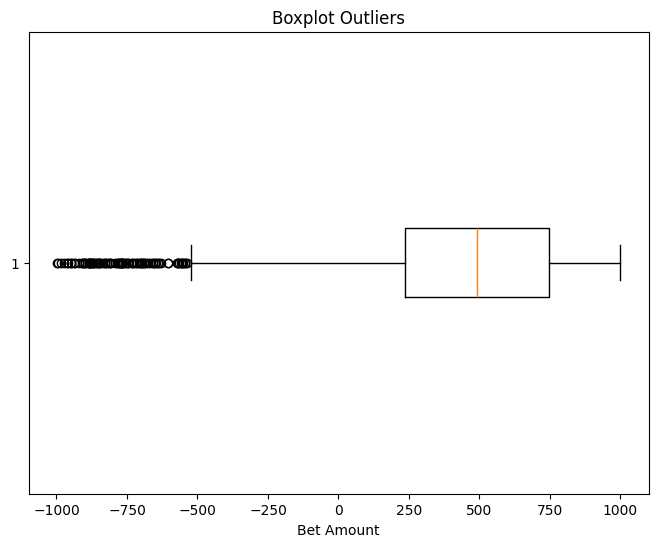

In [188]:
plt.figure(figsize=(8, 6))
plt.boxplot(bets['bet_amount'], vert=False)
plt.xlabel('Bet Amount')
plt.title('Boxplot Outliers')
plt.show()

In this case I would go to the business and present this graph and then clarify if is it normal to have negative bet amounts (it could be a business rule for example if the app allows the person to get 'loans' to do the bet it could be negative)

In [189]:
In this case I will just remonve the outliers lines since it represents only 0.9% of the data

SyntaxError: invalid syntax (929069392.py, line 1)

In [ ]:
bets = bets.loc[~bets['bet_amount'].isin(outliers['bet_amount'])]

In [ ]:
bets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9910 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   bet_id      9910 non-null   int64         
 1   player_id   9910 non-null   int64         
 2   bet_time    9910 non-null   datetime64[ns]
 3   game_type   9910 non-null   object        
 4   bet_amount  9910 non-null   float64       
 5   win_amount  9910 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 542.0+ KB


In [ ]:
#check for outliers in the bet_amount and win_amount columns with interquartile method
Q1 = bets['win_amount'].quantile(0.25)
Q3 = bets['win_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = bets[(bets['win_amount'] < lower_bound) | (bets['win_amount'] > upper_bound)]
outliers.count()

bet_id        744
player_id     744
bet_time      744
game_type     744
bet_amount    744
win_amount    744
dtype: int64

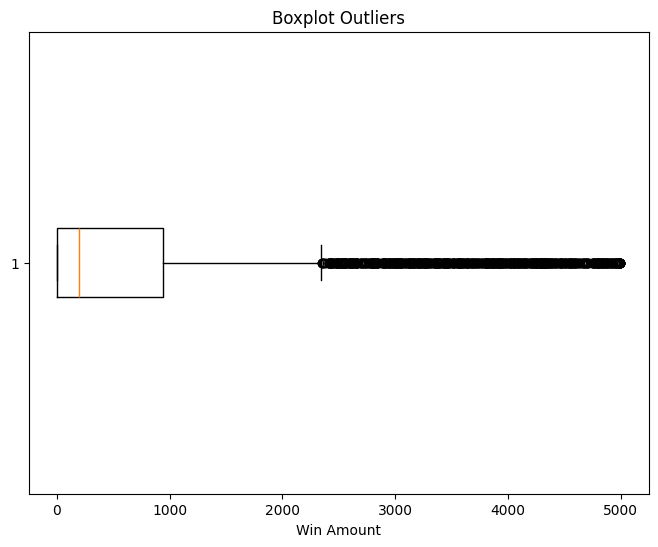

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(bets['win_amount'], vert=False)
plt.xlabel('Win Amount')
plt.title('Boxplot Outliers')
plt.show()

In this case I would also go to the business and ask if those outliers are normal, since a win can be greater I will not do anything with this data. 

### Transactions

In [ ]:
transaction

,transactio_id,player_id,transaction_time,transaction_type,transaction_amount,payment_method,amount
0,1,560,2024-05-17 14:41:42,"""deposit""",373.96,crypto,None
1,2,325,2024-04-28 19:24:08,"""withdrawal""",869.97,crypto,None
2,3,467,2024-12-07 05:42:36,"""withdrawal""",468.41,crypto,None
3,4,719,2024-09-11 19:44:11,"""deposit""",577.80,credit_card,None
4,5,702,2025-03-16 03:40:11,"""deposit""",615.54,credit_card,None
...,...,...,...,...,...,...,...
4995,4996,369,2025-03-03 17:53:51,"""bonus""",397.59,bank_transfer,None
4996,4997,971,2024-06-27 07:32:00,"""bonus""",101.42,paypal,None
4997,4998,954,2024-10-22 17:15:37,"""withdrawal""",926.97,credit_card,None
4998,4999,343,2024-05-23 08:28:46,"""deposit""",522.35,paypal,None


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transactio_id       5000 non-null   int64  
 1   player_id           5000 non-null   int64  
 2   transaction_time    5000 non-null   object 
 3   transaction_type    5000 non-null   object 
 4   transaction_amount  5000 non-null   float64
 5   payment_method      5000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [ ]:
transaction.drop(columns=['amount'], inplace=True)

In [ ]:
transaction['transaction_time'] = pd.to_datetime(transaction['transaction_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
Q1 = transaction['transaction_amount'].quantile(0.25)
Q3 = transaction['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = transaction[(transaction['transaction_amount'] < lower_bound) | (transaction['transaction_amount'] > upper_bound)]
outliers.count()

transactio_id         0
player_id             0
transaction_time      0
transaction_type      0
transaction_amount    0
payment_method        0
dtype: int64

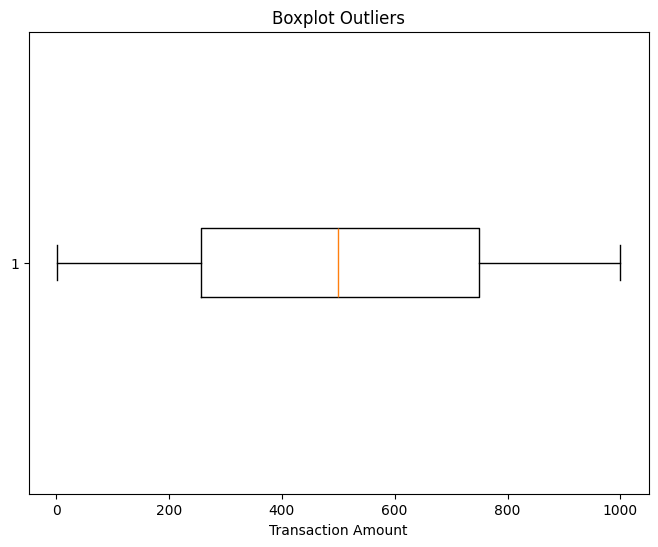

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(transaction['transaction_amount'], vert=False)
plt.xlabel('Transaction Amount')
plt.title('Boxplot Outliers')
plt.show()

In [ ]:
transaction['transaction_type'].unique()


array(['"deposit"', '"withdrawal"', '"bonus"', '"refund"'], dtype=object)

In [ ]:
transaction['payment_method'].unique()

array(['crypto', 'credit_card', 'bank_transfer', 'paypal'], dtype=object)

In [ ]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2026-01-01')
out_of_range = transaction[~transaction['transaction_time'].between(start_date, end_date)]
out_of_range

,transactio_id,player_id,transaction_time,transaction_type,transaction_amount,payment_method


### Session

In [ ]:
sessions

,session_id,player_id,game_id,session_start,session_end,bet_amount,win_amount
0,1,959,14,2025-02-22 21:16:40,2025-02-22 21:48:40,3.90,0.00
1,2,314,11,2024-10-25 02:44:34,2024-10-25 03:46:34,747.22,1494.44
2,3,532,26,2024-12-26 07:41:06,2024-12-26 08:58:06,145.97,145.97
3,4,584,17,2024-06-02 13:55:40,2024-06-02 14:18:40,868.20,1302.30
4,5,612,43,2024-07-23 00:57:18,2024-07-23 02:53:18,412.98,2064.90
...,...,...,...,...,...,...,...
10495,4235,397,15,2024-07-18 14:53:39,2024-07-18 15:42:39,78.95,0.00
10496,8166,360,3,2024-10-12 14:31:06,2024-10-12 15:44:06,528.03,0.00
10497,5048,663,30,2024-10-16 04:47:15,2024-10-16 05:42:15,956.67,0.00
10498,7921,858,36,2024-11-14 16:17:01,2024-11-14 17:07:01,907.41,907.41


In [ ]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   session_id     10500 non-null  int64  
 1   player_id      10500 non-null  int64  
 2   game_id        10500 non-null  int64  
 3   session_start  10500 non-null  object 
 4   session_end    10500 non-null  object 
 5   bet_amount     10500 non-null  float64
 6   win_amount     10500 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 574.3+ KB


In [ ]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
sessions['session_end'] = pd.to_datetime(sessions['session_end'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
Q1 = sessions['bet_amount'].quantile(0.25)
Q3 = sessions['bet_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = sessions[(sessions['bet_amount'] < lower_bound) | (sessions['bet_amount'] > upper_bound)]


In [ ]:
Q1 = sessions['win_amount'].quantile(0.25)
Q3 = sessions['win_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = sessions[(sessions['win_amount'] < lower_bound) | (sessions['win_amount'] > upper_bound)]
outliers.count()

session_id       816
player_id        816
game_id          816
session_start    816
session_end      816
bet_amount       816
win_amount       816
dtype: int64

Text(0.5, 1.0, 'Boxplot Outliers')

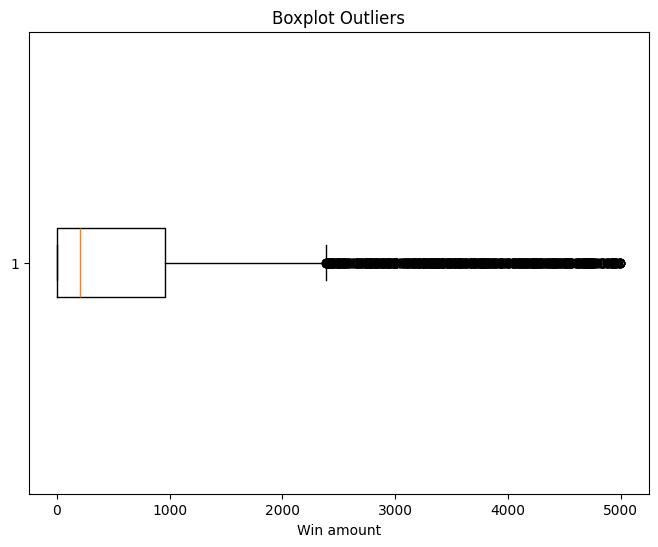

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(sessions['win_amount'], vert=False)
plt.xlabel('Win amount')
plt.title('Boxplot Outliers')

In [ ]:
#Check if all game_ids in sessions are present in the games table
sessions_error = sessions[~sessions['game_id'].between(games['game_id'].min(), games['game_id'].max())]
sessions_error.count()

session_id       0
player_id        0
game_id          0
session_start    0
session_end      0
bet_amount       0
win_amount       0
dtype: int64

### Games

In [202]:
games

,game_id,game_type,provider,volatility,release_date,rtp
0,1,Table Games,Evolution,low,2024-06-22,0.857340
1,2,Live Casino,Evolution,medium,2023-12-22,0.939071
2,3,Sports Betting,NetEnt,medium,2025-03-01,0.853447
3,4,Sports Betting,NetEnt,high,2022-04-12,0.874664
4,5,Sports Betting,Evolution,high,2021-05-30,0.964826
5,6,Slots,Evolution,medium,2022-03-16,0.956424
6,7,Slots,Playtech,high,2024-11-27,0.905306
7,8,Live Casino,Microgaming,low,2022-07-08,0.971593
8,9,Sports Betting,NetEnt,low,2022-02-16,0.874619
9,10,Sports Betting,NetEnt,low,2021-03-09,0.960260


In [195]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   game_id       50 non-null     int64         
 1   game_type     50 non-null     object        
 2   provider      50 non-null     object        
 3   volatility    50 non-null     object        
 4   release_date  50 non-null     datetime64[ns]
 5   rtp           50 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.5+ KB


We can see there are some invalid values in the RTP column, in the real project I would go for the business and ask for the missing values, but in this case I will just replace with the mean.

In [200]:
games['rtp']= pd.to_numeric(games['rtp'], errors='coerce')
games['release_date'] = pd.to_datetime(games['release_date'], format='%Y-%m-%d', errors='coerce')

In [205]:
games['rtp'].fillna(games['rtp'].mean(), inplace=True)

In [208]:
game_type = games['game_type'].unique()
game_type

array(['Table Games', 'Live Casino', 'Sports Betting', 'Slots'],
      dtype=object)

In [209]:
provider = games['provider'].unique()
provider

array(['Evolution', 'NetEnt', 'Playtech', 'Microgaming'], dtype=object)

In [210]:
volatility = games['volatility'].unique()
volatility

array(['low', 'medium', 'high'], dtype=object)

### Campaigns

In [211]:
campaigns

,campaign_id,player_id,name,reward,assigned_at,redeemed
0,1,843,VIP Reward,76.32,2025-03-20 03:09:14,0
1,2,117,Free Spins,98.89,2025-02-08 03:24:13,0
2,3,292,Welcome Bonus,17.87,2024-05-22 14:19:31,1
3,4,785,Free Spins,52.72,2024-06-22 17:02:23,1
4,5,-1,Free Spins,5.59,2025-03-17 14:00:20,0
...,...,...,...,...,...,...
795,796,130,Welcome Bonus,73.24,2024-06-09 12:46:34,0
796,797,382,Welcome Bonus,66.90,2024-11-12 23:17:38,0
797,798,229,VIP Reward,17.02,2024-09-21 18:05:52,0
798,799,538,Welcome Bonus,67.54,2024-08-14 23:51:04,1


In [215]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   campaign_id  800 non-null    int64         
 1   player_id    800 non-null    int64         
 2   name         800 non-null    object        
 3   reward       800 non-null    float64       
 4   assigned_at  800 non-null    datetime64[ns]
 5   redeemed     800 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [214]:
campaigns['assigned_at'] = pd.to_datetime(campaigns['assigned_at'], errors='coerce')

In [218]:
reward = campaigns['name'].unique()
reward

array(['VIP Reward', 'Free Spins', 'Welcome Bonus', 'Cashback Offer'],
      dtype=object)

In [219]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2026-01-01')
out_of_range = campaigns[~campaigns['assigned_at'].between(start_date, end_date)]
out_of_range.count()

campaign_id    0
player_id      0
name           0
reward         0
assigned_at    0
redeemed       0
dtype: int64

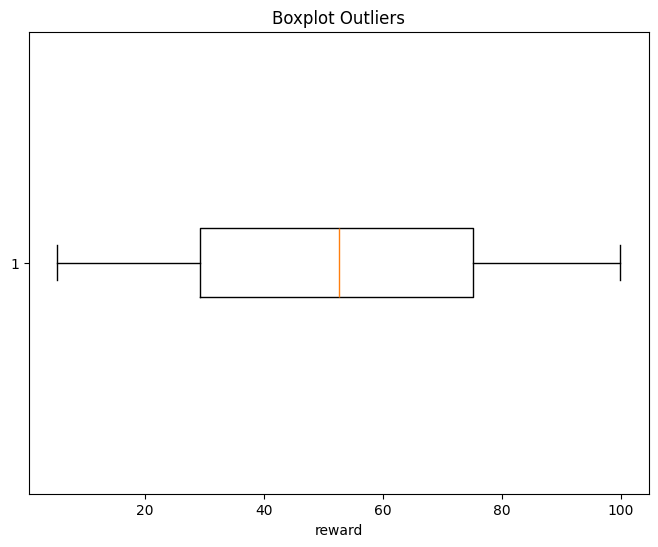

In [221]:
plt.figure(figsize=(8, 6))
plt.boxplot(campaigns['reward'], vert=False)
plt.xlabel('reward')
plt.title('Boxplot Outliers')
plt.show()

# Generating tables to import on Power BI

In [ ]:
players.to_csv(r'./Files for Power BI/players.csv', index=False)
bets.to_csv(r'./Files for Power BI/bets.csv', index=False)
transaction.to_csv(r'./Files for Power BI/transaction.csv', index=False)
sessions.to_csv(r'./Files for Power BI/sessions.csv', index=False)
games.to_csv(r'./Files for Power BI/games.csv', index=False)
campaigns.to_csv(r'./Files for Power BI/campaigns.csv', index=False)